# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.
We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle.https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting weather a patient has heart disease during the proof of concept,  we'll persue the project.

## 4. Features

**create the dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    * 0 = normal
    * 1 = fixed defect
    * 2 = reversable defect and the label
14. condition: 
    * 0 = no disease
    * 1 = disease


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [18]:
## Import all tools

## Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, plot_roc_curve

In [19]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?
 

In [20]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

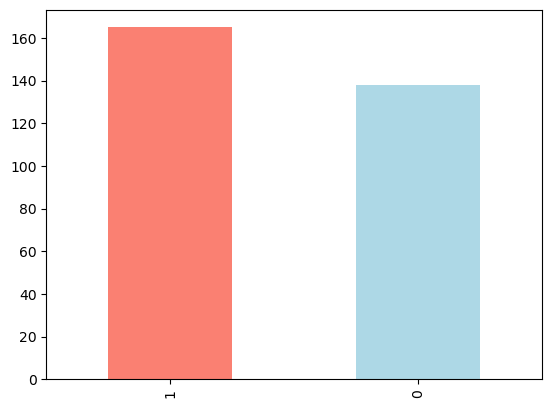

In [21]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
## comparing sex

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [25]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


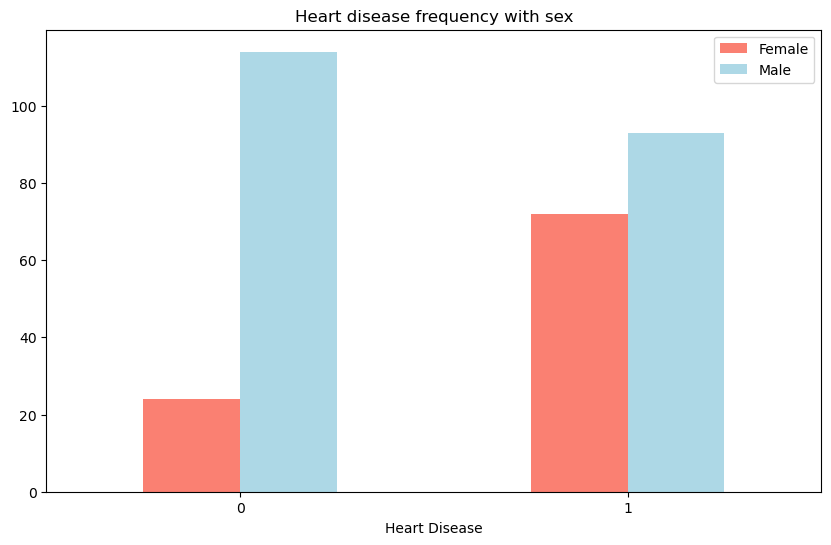

In [26]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'],
                                   xlabel='Heart Disease',
                                   title="Heart disease frequency with sex");

plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Age vs Thalach for heart disease**

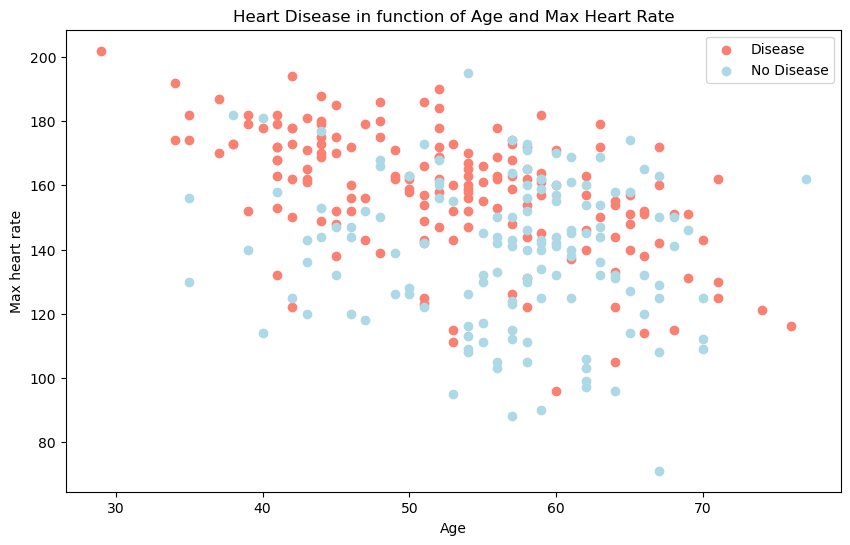

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease']);

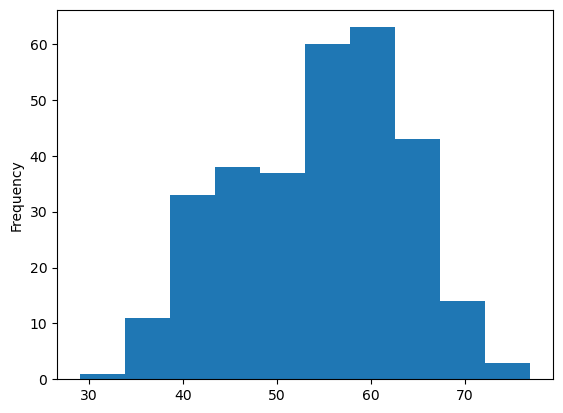

In [29]:
## check the distibution

df.age.plot.hist();

In [30]:
### heart disease frequency with chest pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


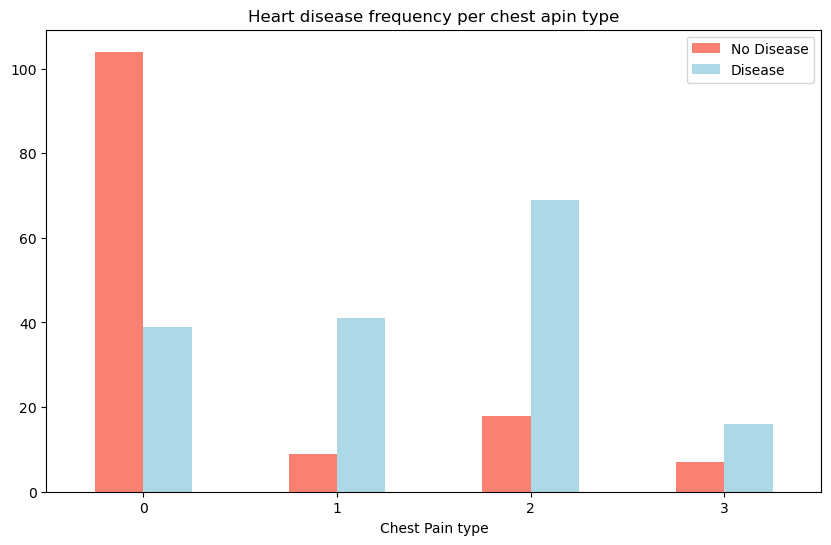

In [31]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'],
                                   xlabel='Chest Pain type')
plt.title("Heart disease frequency per chest apin type")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

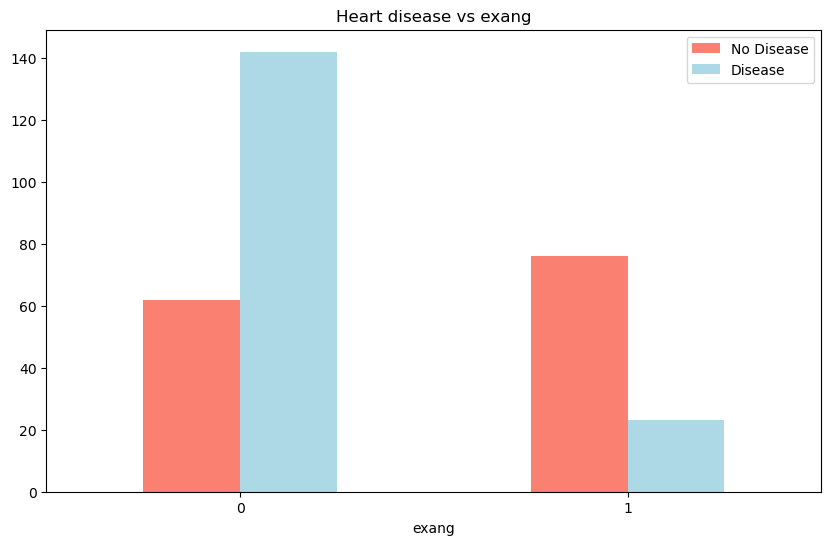

In [46]:
pd.crosstab(df.exang, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'],
                                   xlabel='exang')
plt.title("Heart disease vs exang")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


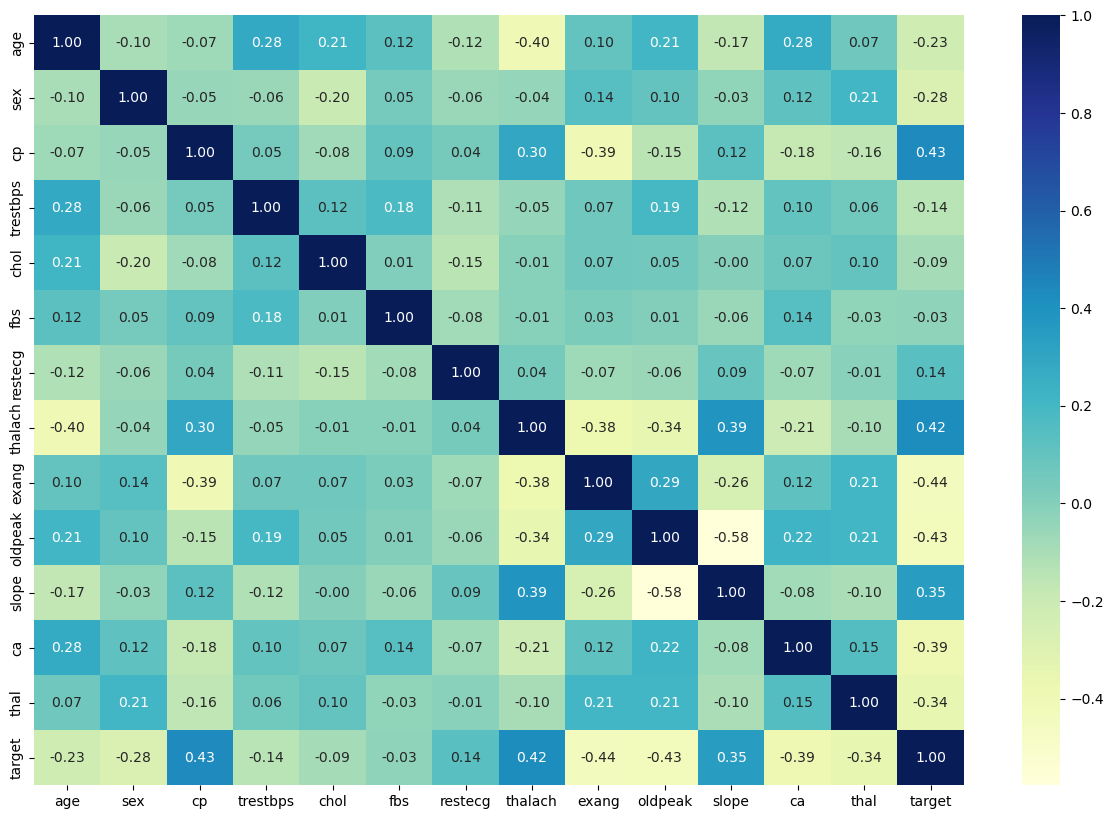

In [53]:
## let make little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0,
                fmt=".2f",
                cmap='YlGnBu')

## 5. Modelling


In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# split data into X and y

X = df.drop('target', axis=1)
y = df['target']

In [58]:
# split into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [59]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [60]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

1. Logistic Regression
2. K-Nearest neighbors
3. RandomForestClassifier


In [77]:
# put models in dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
         }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    model_scores={}
    
    for name in models:
        models[name].fit(X_train, y_train)
        model_scores[name] = models[name].score(X_test, y_test)
    return model_scores    

In [80]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/nikhil/Desktop/projects/heart_disease/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot: >

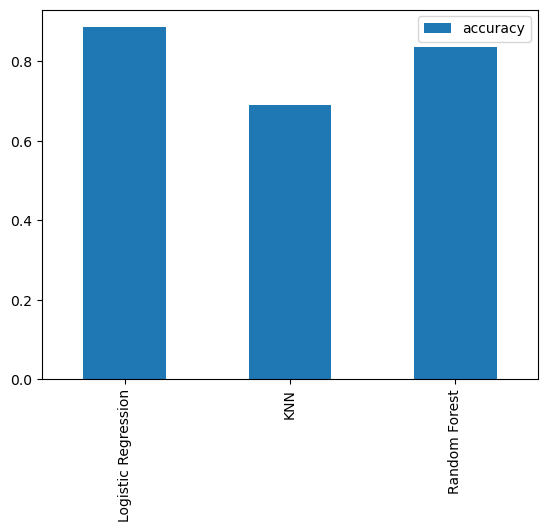

In [83]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot(kind='bar')

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.
what should do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* classification report
* ROC curve
* Area under the curve (AUC)

### Hypyterparameter tuning

In [88]:
# let's tune KNN
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores

max scores of KNN is: 75.41%


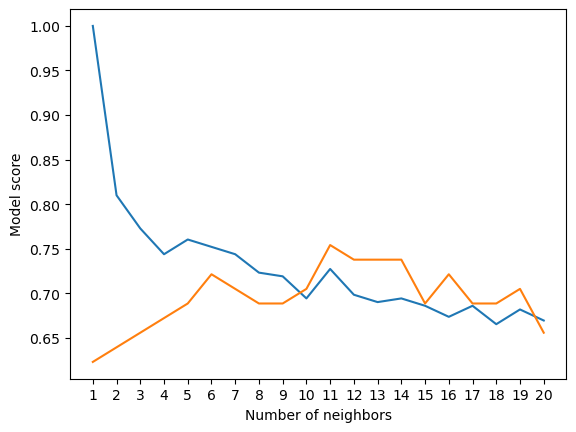

In [95]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel('Model score')

print(f"max scores of KNN is: {max(test_scores)*100:.2f}%")


In [96]:
## so we will discord KNN

 ### Tuning with RandomizedSearchCV
 
 we're going to tune:
 * LogisticRegression
 * RandomForestClassifier

In [110]:
# create a hyperparameter grid

log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [117]:
# Tune LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [106]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [107]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [111]:
# Tune RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [112]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [114]:
rs_rf.score(X_test, y_test)

0.8688524590163934

 ### Tuning with GridSearchCV

In [116]:
## we will only use LogisticRegression


In [120]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [121]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [122]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.
 
 To make comparisons and evaluate our trained model, first we need to make predictions.

In [123]:
  y_preds = gs_log_reg.predict(X_test)

/Users/nikhil/Desktop/projects/heart_disease/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


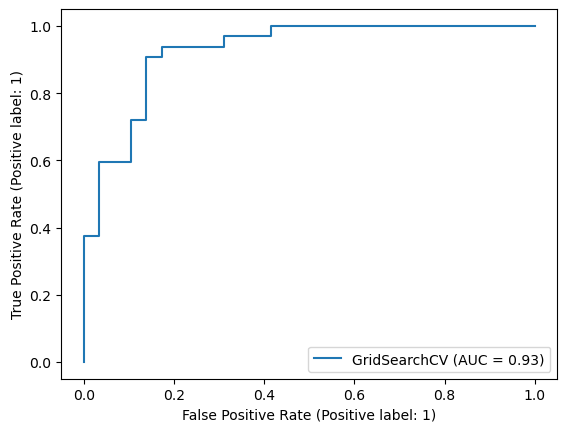

In [124]:
## from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg, X_test, y_test)

In [125]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

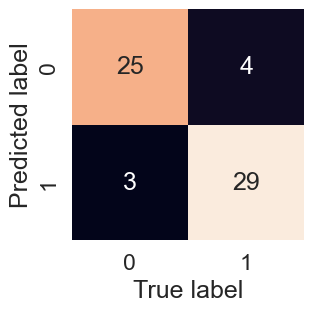

In [128]:
sns.set(font_scale=1.5)

def plot_conf_mat (y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap ()
    """
    fig, ax = plt.subplots(figsize= (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat (y_test, y_preds)

In [131]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using
`cross_val_score()`.

In [132]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [133]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

In [139]:
# accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc.mean()

0.8446994535519124

In [140]:
# precision
cv_pres = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_pres.mean()

0.8207936507936507

In [141]:
# recall
cv_rec = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_rec.mean()

0.9212121212121213

In [143]:
# f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1.mean()

0.8673007976269721

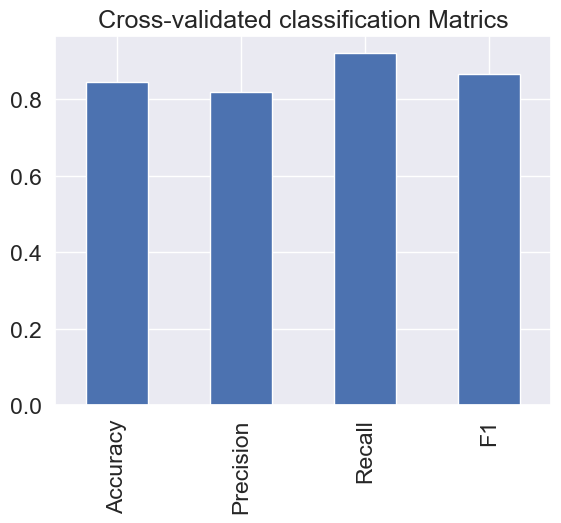

In [158]:
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc.mean(),
    'Precision': cv_pres.mean(),
    'Recall': cv_rec.mean(),
    'F1': cv_f1.mean()
}, index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification Matrics',
                     legend=False);

### Feature Importance
Feature importance is another as asking,
"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

In [159]:
## for LogisticRegression

In [160]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')
clf.fit(X_train, y_train);

In [161]:
clf.coef_

array([[ 0.00316728, -0.86044662,  0.66067038, -0.01156993, -0.00166374,
         0.04386106,  0.31275853,  0.02459361, -0.60413087, -0.56862799,
         0.4505163 , -0.63609901, -0.67663377]])

In [162]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672816664025417,
 'sex': -0.8604466164764594,
 'cp': 0.660670378971457,
 'trestbps': -0.011569931858994414,
 'chol': -0.0016637446649201797,
 'fbs': 0.04386106245399992,
 'restecg': 0.31275852888688666,
 'thalach': 0.024593614591211826,
 'exang': -0.6041308666006405,
 'oldpeak': -0.5686279913648149,
 'slope': 0.45051630416484045,
 'ca': -0.636099010407402,
 'thal': -0.6766337677461476}

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


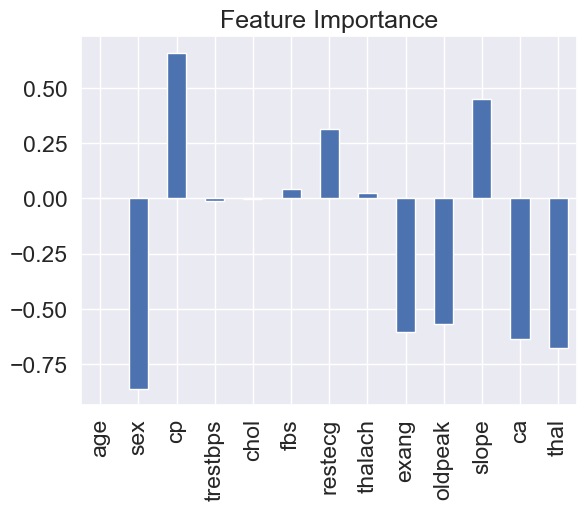

In [164]:
featue_df = pd.DataFrame(feature_dict, index=[0])
featue_df.T.plot.bar(title="Feature Importance", legend=False);

In [165]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [166]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [167]:
pd.crosstab(df.thal, df.target)

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28
